In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# lets create synthetic data points
from sklearn.datasets import make_classification

In [3]:
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2 , n_clusters_per_class=2,n_redundant=0)

<Axes: xlabel='0', ylabel='1'>

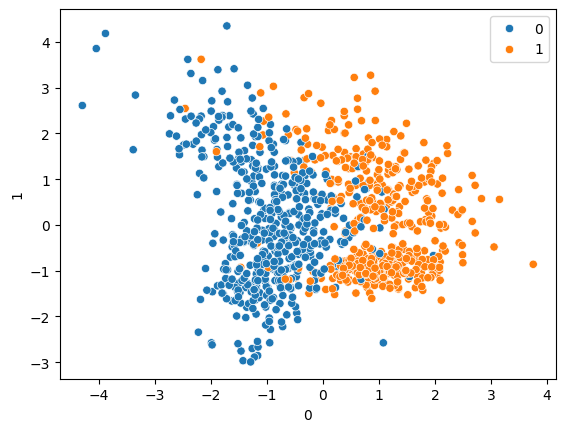

In [4]:
df = pd.DataFrame(X)
sns.scatterplot(x=df[0], y=df[1], hue=y)


In [5]:
from sklearn.svm import SVC


In [6]:
svc = SVC()

In [7]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 , test_size=0.25)

In [8]:
svc.fit(X_train,y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [9]:
y_pred = svc.predict(X_test)

In [10]:
from sklearn.metrics import classification_report , confusion_matrix


In [11]:
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       114
           1       0.95      0.93      0.94       136

    accuracy                           0.94       250
   macro avg       0.93      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250

[[108   6]
 [ 10 126]]


In [12]:
rbf=SVC(kernel='rbf')


In [13]:
rbf.fit(X_train,y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [14]:
y_pred=rbf.predict(X_test)

In [15]:
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.92      0.95      0.93       114
           1       0.95      0.93      0.94       136

    accuracy                           0.94       250
   macro avg       0.93      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250

[[108   6]
 [ 10 126]]


In [16]:
polynomial=SVC(kernel='poly')
polynomial.fit(X_train,y_train)
y_pred=polynomial.predict(X_test)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90       129
           1       0.86      0.94      0.90       121

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250

[[111  18]
 [  7 114]]


In [17]:
sigmoid=SVC(kernel='sigmoid')
sigmoid.fit(X_train,y_train)
y_pred=sigmoid.predict(X_test)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       114
           1       0.85      0.82      0.84       136

    accuracy                           0.82       250
   macro avg       0.82      0.82      0.82       250
weighted avg       0.82      0.82      0.82       250

[[ 94  20]
 [ 24 112]]


In [18]:
from sklearn.model_selection import GridSearchCV
param={
    'C':[0.1,1,10,100,1000],
    'gamma':[1,0.1,0.01,0.001,0.0001],
    'kernel':['rbf']
}

In [19]:
grid=GridSearchCV(SVC(),param_grid=param,cv=5,verbose=3,refit=True)

In [20]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.953 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.927 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.927 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.867 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.940 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': [1, 0.1, ...], 'kernel': ['rbf']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,10


In [21]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [22]:
grid.best_score_

np.float64(0.924)

In [23]:
y_pred=grid.predict(X_test)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       114
           1       0.95      0.92      0.93       136

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250

[[107   7]
 [ 11 125]]


In [24]:
# KERNEL POWER

In [25]:
x= np.linspace(-5.0,5.0,100)
y= np.sqrt(10**2-x**2)
y=np.hstack([y,-y])
x=np.hstack([x,-x])

In [26]:
x1=np.linspace(-5.0,5.0,100)
y1=np.sqrt(5**2-x1**2)
y1=np.hstack([y1,-y1])
x1=np.hstack([x1,-x1])

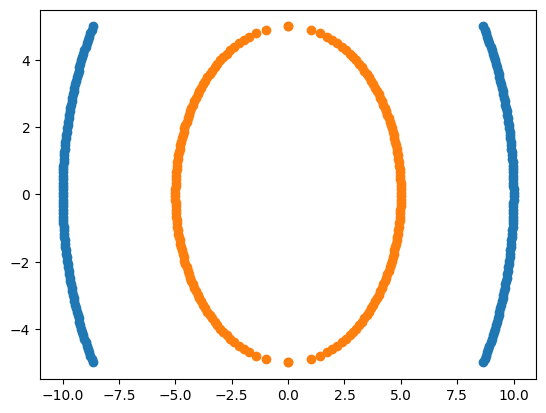

In [27]:
plt.scatter(y,x)
plt.scatter(y1,x1)

In [28]:
df1 = pd.DataFrame(
    np.vstack([x, y]).T,
    columns=['X1', 'X2']
)
df1['Y'] = 0

df2 = pd.DataFrame(
    np.vstack([x1, y1]).T,
    columns=['X1', 'X2']
)
df2['Y'] = 1

df = pd.concat([df1, df2], ignore_index=True)
df.head()


,X1,X2,Y
0,-5.00000,8.660254,0
1,-4.89899,8.717792,0
2,-4.79798,8.773790,0
3,-4.69697,8.828277,0
4,-4.59596,8.881281,0


In [29]:
df.tail()

,X1,X2,Y
395,-4.59596,-1.969049,1
396,-4.69697,-1.714198,1
397,-4.79798,-1.406908,1
398,-4.89899,-0.999949,1
399,-5.00000,-0.000000,1


In [30]:
X= df.iloc[:,:2]
y=df.Y

In [31]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: Y, Length: 400, dtype: int64

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.25)

In [33]:
# polynomial kernel

In [34]:

df['X1_Square']=df['X1']**2
df['X2_Square']=df['X2']**2
df['X1*X2']=(df['X1']*df['X2'])
df.head()

,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,-5.00000,8.660254,0,25.000000,75.000000,-43.301270
1,-4.89899,8.717792,0,24.000102,75.999898,-42.708375
2,-4.79798,8.773790,0,23.020610,76.979390,-42.096467
3,-4.69697,8.828277,0,22.061524,77.938476,-41.466150
4,-4.59596,8.881281,0,21.122845,78.877155,-40.818009


In [35]:
X=df[['X1','X2','X1_Square','X2_Square','X1*X2']]
y=df['Y']


In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [37]:
!pip install plotly


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
!pip install ipykernel



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
!pip install --upgrade nbformat ipython plotly



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
import plotly.express as px

df['X1_X2'] = df['X1'] * df['X2']

fig = px.scatter_3d(
    df,
    x='X1',
    y='X2',
    z='X1_X2',
    color='Y'
)

fig.show()


In [41]:
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "browser"

df['X1_X2'] = df['X1'] * df['X2']

fig = px.scatter_3d(
    df,
    x='X1',
    y='X2',
    z='X1_X2',
    color='Y'
)

fig.show()


In [42]:
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "browser"

df['X1_X2'] = df['X1'] * df['X2']

fig = px.scatter_3d(
    df,
    x='X1_Square',
    y='X1_Square',
    z='X1_X2',
    color='Y'
)

fig.show()


In [43]:
from sklearn.metrics import accuracy_score

In [44]:
classifier=SVC(kernel="linear")
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

In [45]:
classifier=SVC(kernel="poly")
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
accuracy_score(y_test,y_pred)


1.0

In [46]:
classifier=SVC(kernel="rbf")
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
accuracy_score(y_test,y_pred)



1.0

In [47]:
classifier=SVC(kernel="sigmoid")
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
accuracy_score(y_test,y_pred)


1.0

In [48]:
# dataset - tips

In [50]:
df=sns.load_dataset('tips')

In [51]:
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [53]:
df['sex'].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [54]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [ ]:
## Feature encoding
# label encoding ,one hot encoding


In [55]:
# independent and dependent features
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [56]:
X=df[['tip', 'sex', 'smoker', 'day', 'time', 'size']]
y=df['total_bill']

In [57]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=45)

In [59]:
#feature encoding
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
le2=LabelEncoder()
le3=LabelEncoder()

In [61]:
X_train['sex']=le1.fit_transform(X_train['sex'])
X_train['smoker']=le2.fit_transform(X_train['smoker'])
X_train['time']=le3.fit_transform(X_train['time'])

In [62]:
X_train.head()


,tip,sex,smoker,day,time,size
100,2.50,0,1,Fri,0,2
10,1.71,1,0,Sun,0,2
130,1.50,1,0,Thur,1,2
72,3.14,0,1,Sat,0,2
151,2.00,1,0,Sun,0,2


In [63]:
X_test['sex']=le1.transform(X_test['sex'])
X_test['smoker']=le2.transform(X_test['smoker'])
X_test['time']=le3.transform(X_test['time'])

In [65]:
#OHE - Column tranformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [70]:
ct = ColumnTransformer(
    transformers=[('onehot', OneHotEncoder(drop='first'), [3])],
    remainder='passthrough'
)

X_train = ct.fit_transform(X_train)


In [71]:
import sys
np.set_printoptions(threshold=sys.maxsize)

In [72]:
X_train

array([[ 0.  ,  0.  ,  0.  ,  2.5 ,  0.  ,  1.  ,  0.  ,  2.  ],
       [ 0.  ,  1.  ,  0.  ,  1.71,  1.  ,  0.  ,  0.  ,  2.  ],
       [ 0.  ,  0.  ,  1.  ,  1.5 ,  1.  ,  0.  ,  1.  ,  2.  ],
       [ 1.  ,  0.  ,  0.  ,  3.14,  0.  ,  1.  ,  0.  ,  2.  ],
       [ 0.  ,  1.  ,  0.  ,  2.  ,  1.  ,  0.  ,  0.  ,  2.  ],
       [ 1.  ,  0.  ,  0.  ,  2.75,  0.  ,  0.  ,  0.  ,  2.  ],
       [ 0.  ,  1.  ,  0.  ,  2.  ,  1.  ,  1.  ,  0.  ,  5.  ],
       [ 1.  ,  0.  ,  0.  ,  2.64,  1.  ,  0.  ,  0.  ,  3.  ],
       [ 1.  ,  0.  ,  0.  ,  4.3 ,  1.  ,  0.  ,  0.  ,  2.  ],
       [ 1.  ,  0.  ,  0.  ,  3.  ,  1.  ,  1.  ,  0.  ,  3.  ],
       [ 0.  ,  0.  ,  1.  ,  2.  ,  0.  ,  0.  ,  1.  ,  2.  ],
       [ 1.  ,  0.  ,  0.  ,  2.  ,  0.  ,  1.  ,  0.  ,  2.  ],
       [ 1.  ,  0.  ,  0.  ,  2.  ,  1.  ,  1.  ,  0.  ,  4.  ],
       [ 0.  ,  0.  ,  1.  ,  2.5 ,  1.  ,  0.  ,  1.  ,  2.  ],
       [ 1.  ,  0.  ,  0.  ,  3.09,  0.  ,  1.  ,  0.  ,  4.  ],
       [ 0.  ,  0.  ,  1.

In [73]:
X_test=ct.transform(X_test)

In [74]:
# SVR
from sklearn.svm import SVR

In [75]:
svr=SVR()

In [76]:
svr.fit(X_train,y_train)

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [77]:
y_pred=svr.predict(X_test)

In [79]:
from sklearn.metrics import r2_score , mean_absolute_error
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.4634461945331312
4.232847321153961


In [80]:
# hyperparameter tuning using grid search cv
grid = GridSearchCV(SVR(),param_grid=param,refit=True,verbose=3)
grid.fit(X_train,y_train)



Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.027 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.045 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.207 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.025 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.042 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.049 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.053 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.111 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.155 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.162 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.028 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

,estimator,SVR()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': [1, 0.1, ...], 'kernel': ['rbf']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,kernel,'rbf'


In [81]:
grid.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [82]:
grid_predict = grid.predict(X_test)

In [84]:
print(r2_score(y_test,grid_predict))
print(mean_absolute_error(y_test,grid_predict))

0.5356963367537593
3.8972213253338728
